# Exploratory Data Analysis 

In [249]:
import pandas as pd 
import re
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

## Traitement du fichier

### Chargement du fichier

In [250]:
filename = "Demandeurs d’emploi inscrits en fin de mois à Pôle emploi par Comune.csv"

data = pd.read_csv(filename,
                   sep=";",
                   skiprows=3,
                   engine='python',
                   skipfooter=1)
# On va supprimer la dernère la colonnes des communes de moins 500 habs
data = data.iloc[:,0:25]

data = data.applymap(lambda x: x.replace(" ",""))

### Standardisation des dates

In [251]:
new_months = pd.date_range(start="07-2016", end="01-2023",name = "Mois",freq="M",inclusive="both")

### Standardisation des codes postaux 

In [252]:
# Expression régulière pour isoler les codes postaux
# D'abord on a besoin d'isoler les cp
# Ensuite on isole les données

all_but_first = data.columns != "Mois"
data.columns[all_but_first]
def keep_only_cp(x):
    return re.search("\d{5}",x).group(0)

cp_standard = [keep_only_cp(column) for column in data.columns[all_but_first]]

In [253]:
new_data = pd.DataFrame(data.iloc[:,all_but_first].values,new_months)
new_data.columns = cp_standard
x = new_data.astype('int32')

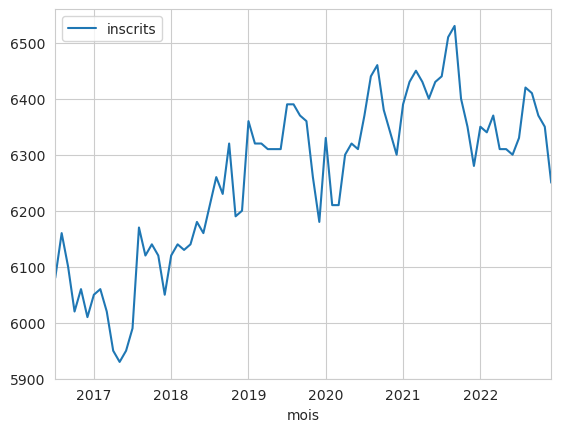

In [290]:

# pseudo matrix translation
new_data = pd.DataFrame({
    "code postal" : np.repeat(x.columns, x.shape[0]),
    "mois" : pd.concat([
        pd.Series(x.index) for i in range(x.shape[1])
        ]).to_numpy(),
    "inscrits" : np.reshape(x.to_numpy(),x.shape[0]*x.shape[1],order= "F")
})

sns.set_style("whitegrid")
stemarie = new_data["code postal"] == "97438"
new_data.loc[stemarie,:].plot(y = "inscrits",x = "mois")

plt.show()
